In [1]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data

df = pd.read_pickle('Data.RQ5')

In [4]:
# get for each hour the average number of sessions

sessions_per_hour = unique_sessions.groupby(by= unique_sessions.event_time.dt.hour, as_index= False)['event_time'].count().reset_index()
sessions_per_hour.rename(columns={'index':'hour', 'event_time': 'sessions_per_hour'}, inplace=True)

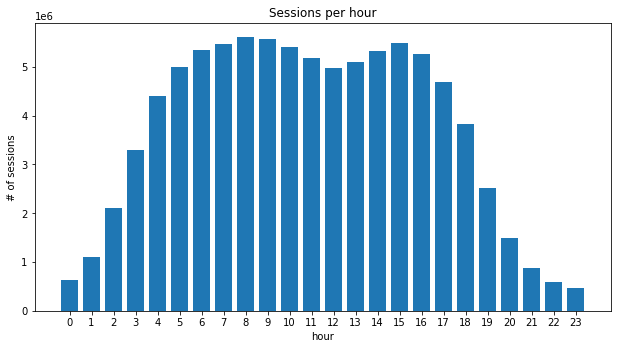

In [5]:
# plot the previous result

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sessions_per_hour.hour, sessions_per_hour.sessions_per_hour)
fig.set_figheight(4)
fig.set_figwidth(8)
plt.title('Sessions per hour')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('hour')
plt.ylabel('# of sessions')
plt.show()

In [6]:
# get how many times each weekday appears in our dataset

sessions_per_weekday = unique_sessions.groupby(unique_sessions.event_time.dt.weekday)['event_time'].count()

In [7]:
# keep only 1 session per day, this helps us find out how many Mondays/Tuesdays/Etc. exist in our 7 months timeframe. Comparing each weekday based only on the previous result (sessions_per_weekday) would have been incorrect in most cases. To understand that, consider the following example:

# timeframe: Oct-1-2019 / Oct-31-2019)
# sessions_per_weekday: {Wednesday: 55, Thursday: 55}
# weekday_count: {Wednesday: 4, Thursday: 5} (We have 4 Wednesdays and 5 Thursdays in our timeframe)
#  Based on 'sessions_per_weekday' we would conclude that the two weekdays are equal in terms of number of sessions, but instead Wednesday is clearly a busier day

unique_sessions['event_time'] = unique_sessions.event_time.dt.normalize()
unique_days = unique_sessions.drop_duplicates(subset = ['event_time'])
weekday_count = unique_days.groupby(unique_days.event_time.dt.weekday)['event_time'].count()

<ipython-input-7-8714ef607246>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_sessions['event_time'] = unique_sessions.event_time.dt.normalize()


In [8]:
# avg sessions per hour for each weekday, now they are comparable

avg_sessions = sessions_per_weekday / weekday_count / 24

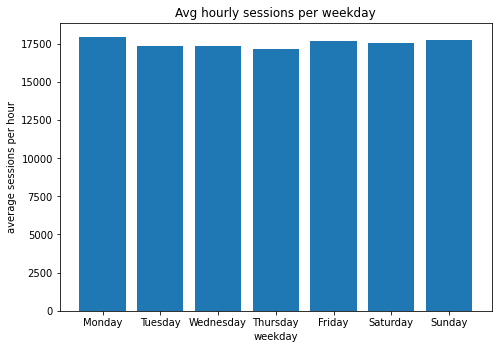

In [9]:
# plot the previous result

WEEKDAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(WEEKDAYS, avg_sessions)
plt.title('Avg hourly sessions per weekday')
plt.xlabel('weekday')
plt.ylabel('average sessions per hour')
plt.show()